In [69]:
from math import log, exp
import numpy as np
from collections import Counter
import seaborn as sns
import pandas as pd

In [41]:
def comment_diversity0(lot):
    '''
    lot: list of tuples
    '''
    numerator = sum([b for _,b in lot])
    denominator = sum([a*b for a,b in lot])
    print('#Unique:', sum([b for _,b in lot]))
    print('#Total:', denominator)
    return numerator/denominator

In [42]:
caseA = [(1,9),(11,1)]
caseB = [(2,10)]

In [43]:
print('caseA:', comment_diversity0(caseA))
print('caseB:', comment_diversity0(caseB))

#Unique: 10
#Total: 20
caseA: 0.5
#Unique: 10
#Total: 20
caseB: 0.5


In [57]:
def comment_diversity_exp(lot, verbose=False):
    '''
    lot: list of tuples
    '''
    numerator = sum([b*exp(a) for a,b in lot])
    denominator = sum([a*b for a,b in lot])
    if verbose:
        print('#Unique:', sum([b for _,b in lot]))
        print('#Total:', denominator)
    return numerator/denominator

print('caseA:', comment_diversity_exp(caseA))
print('caseB:', comment_diversity_exp(caseB))

#Unique: 10
#Total: 20
caseA: 2994.9303125826973
#Unique: 10
#Total: 20
caseB: 3.694528049465325


In [36]:
test_cmts = np.random.randint(20, size=20)
print(test_cmts)

[ 7 19 16 16 17 14  7  8 10 19  4 19  1  3 19 15 15  2  4 17]


In [38]:
test_dist = Counter(test_cmts)
groupedCounts = [v for k,v in test_dist.items()]
groupedCounts

[2, 4, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1]

In [47]:
caseX = list(Counter(groupedCounts).items())
print('caseX:', caseX)
print('caseA:', comment_diversity_exp(caseA))
print('caseB:', comment_diversity_exp(caseB))
print('caseX:', comment_diversity_exp(caseX))

caseX: [(2, 5), (4, 1), (1, 6)]
#Unique: 10
#Total: 20
caseA: 2994.9303125826973
#Unique: 10
#Total: 20
caseB: 3.694528049465325
#Unique: 12
#Total: 20
caseX: 5.392656074927588


In [85]:
def trials(N=10, verbose=False):
    max_duplicities = [] # maximum comment duplicity
    n_uniques = [] # number of unique comments
    diversity_scores = []
    data = []
    for k in range(N):
        test_cmts = np.random.randint(20, size=20)
        test_dist = Counter(test_cmts)
        groupedCounts = [v for k,v in test_dist.items()]
        caseX = list(Counter(groupedCounts).items())
        diversity_scores.append(comment_diversity_exp(caseX))
        max_duplicities.append(max([a for a,_ in caseX]))
        n_uniques.append(sum([b for _,b in caseX]))
        data.append(caseX)
    return max_duplicities, n_uniques, diversity_scores, data

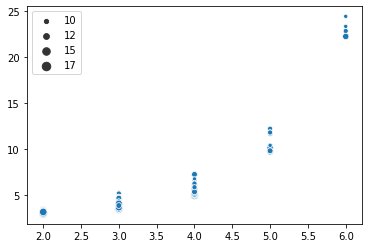

In [86]:
x,u,y,data = trials(N=500)
sns.scatterplot(x=x,y=y,size=u);

In [87]:
df = pd.DataFrame({'x':x, 'y':y, 'u':u})
df.head()

,x,y,u
0,3,3.705315,14
1,3,3.705315,14
2,3,3.705315,14
3,3,4.301849,12
4,3,4.301849,12


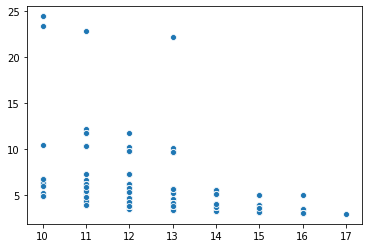

In [90]:
tmp = df.loc[df.x==5,:]
sns.scatterplot(x=u,y=y);

In [94]:
np.argwhere(np.array(y)==max(y))

array([[241]])

In [95]:
data[241]

[(1, 6), (6, 1), (4, 1), (2, 2)]

In [96]:
df.to_csv('diversity.csv', index=False)